In [11]:
import numpy as np 
from numpy import newaxis

In [12]:
# Data points generation:

# génération of 100 points 3D according to gaussian law centered on [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3] 
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

In [13]:
# Label generation for 5 groups:
c1 = np.ones(100)      
c2 = 2 * np.ones(100)  
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

In [14]:
# Adding labels as fourth colomn
data1 = np.hstack((d1,c1[:,newaxis])) 
data2 = np.hstack((d2,c2[:,newaxis]))
data3 = np.hstack((d3,c3[:,newaxis]))
data4 = np.hstack((d4,c4[:,newaxis]))
data5 = np.hstack((d5,c5[:,newaxis]))

In [15]:
# Concatenating all data points:
data = np.concatenate((data1,data2,data3,data4,data5))
data.shape

(500, 4)

In [16]:
# Let's shuffle the points:
np.random.shuffle(data)

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


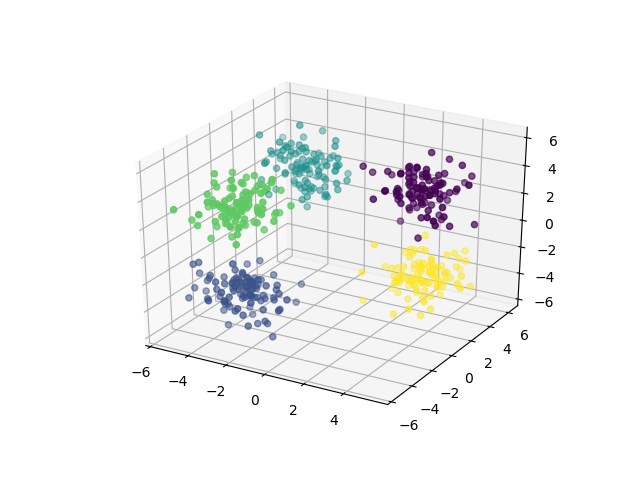

In [18]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=data[:,3])
plt.show()

In [21]:
from sklearn.cluster import KMeans
# Kmeans with Kmeans++ as initialisation method
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data[:,:3])

<IPython.core.display.Javascript object>


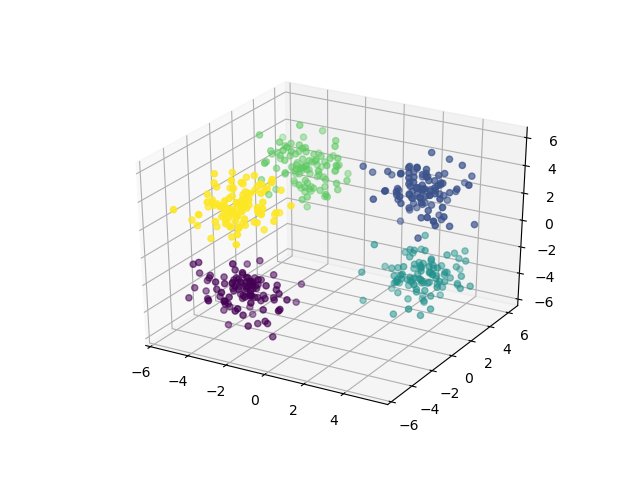

In [22]:
%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(data[:,0], data[:,1], data[:,2], c=kmeans.labels_)
plt.show()

In [23]:
from sklearn import metrics
metrics.adjusted_rand_score(kmeans.labels_, data[:,3])

1.0

<IPython.core.display.Javascript object>


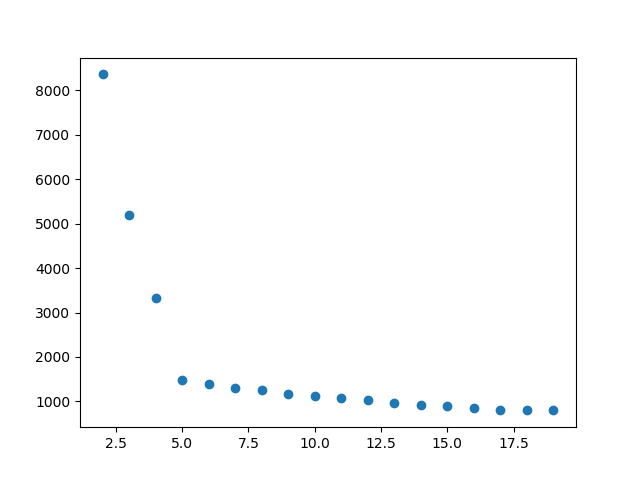

In [24]:
inertias2 = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, n_init=1, init='k-means++').fit(data[:,:3])
    inertias2.append(kmeans.inertia_)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter([i for i in range(2, 20)], inertias2)
plt.show()  

In [38]:
# Kmeans with random initialisation method
kmeansr = KMeans(n_clusters=5, n_init=1, init='random').fit(data[:,:3])
metrics.adjusted_rand_score(kmeansr.labels_, data[:,3])

0.7021917954542931

<IPython.core.display.Javascript object>


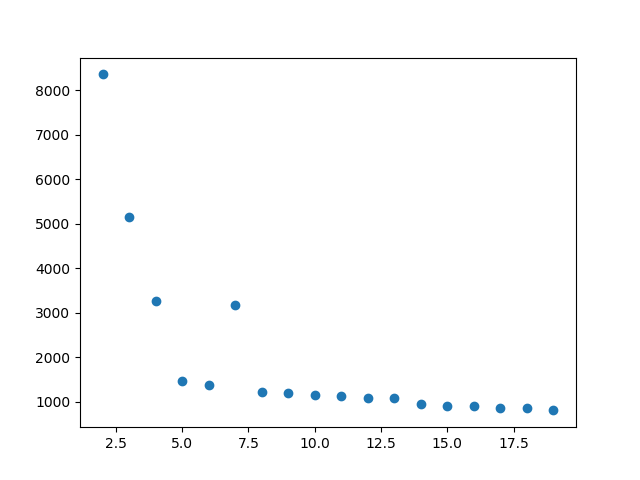

In [25]:
inertias3 = []
for i in range(2, 20):
    kmeansr = KMeans(n_clusters=i, n_init=1, init='random').fit(data[:,:3])
    inertias3.append(kmeansr.inertia_)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter([i for i in range(2, 20)], inertias3)
plt.show()    


<IPython.core.display.Javascript object>


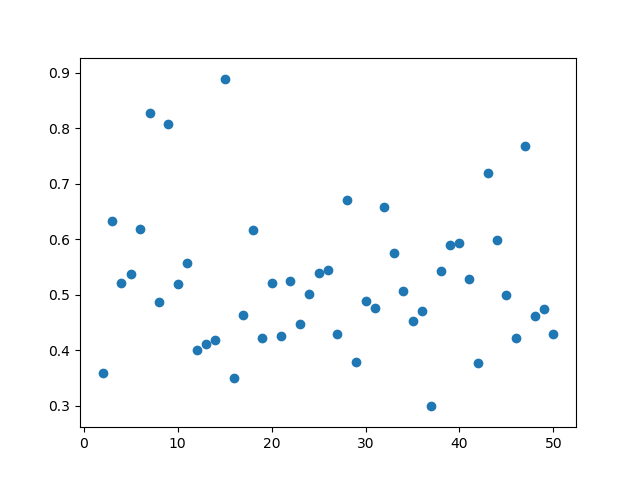

In [56]:
# generate 500 random points
data_points = np.random.uniform(0, 1, (500, 3))
# kmeans with init random
nbr_iter = 50
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data_points)
labels_res = kmeans.labels_
rand_indxs = []
for i in range(nbr_iter - 1):
    kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data_points)
    rand_indxs.append( metrics.adjusted_rand_score(kmeans.labels_, labels_res) )
    labels_res = kmeans.labels_
    
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter([i for i in range(2, nbr_iter+1)], rand_indxs)
plt.show()     

<IPython.core.display.Javascript object>


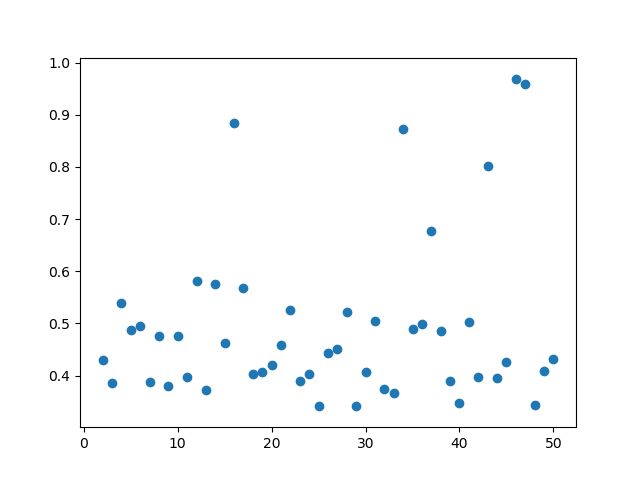

In [26]:
# generate 500 random points
data_points = np.random.uniform(0, 1, (500, 3))
#data_points = np.random.rand(500, 3)
# kmeans with init random
nbr_iter = 50
kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data_points)
labels_res = kmeans.labels_
rand_indxs = []
for i in range(nbr_iter - 1):
    kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data_points)
    rand_indxs.append( metrics.adjusted_rand_score(kmeans.labels_, labels_res) )
    labels_res = kmeans.labels_
    
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter([i for i in range(2, nbr_iter+1)], rand_indxs)
plt.show() 

<IPython.core.display.Javascript object>


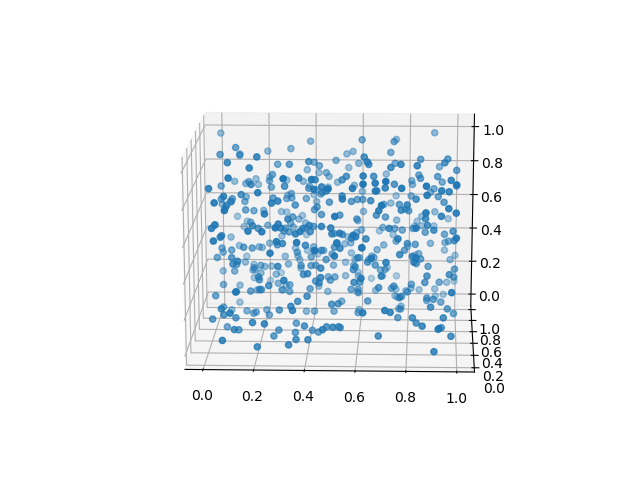

In [60]:
%matplotlib notebook
fig10 = plt.figure()
ax10 = fig10.add_subplot(111, projection='3d')
ax10.scatter(data_points[:,0], data_points[:,1], data_points[:,2])
plt.show()

In [38]:
# Working with texture data:
textures = np.loadtxt('texture.dat')
np.random.shuffle(textures)
x_textu = textures[:,:40]
y_textu = textures[:,40]
kmeans11 = KMeans(n_clusters=11).fit(x_textu)
metrics.adjusted_rand_score(kmeans11.labels_, y_textu)
# We can see that with this kind of data the classification with kmeans is not so effective

0.5447807032162953

In [39]:
# now let's apply lda
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(x_textu)
x_projected = pca.transform(x_textu)

<IPython.core.display.Javascript object>


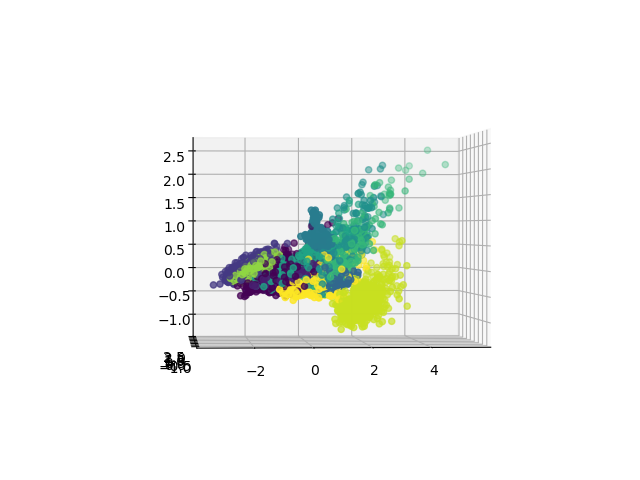

In [45]:
# displaying points projected to PCA axes
# The color change according to real labels
%matplotlib notebook
fig11 = plt.figure()
ax11 = fig11.add_subplot(111, projection='3d')
ax11.scatter(x_projected[:,0], x_projected[:,1], x_projected[:,2], c = y_textu)
plt.show()

In [49]:
# now let's apply kmeans with data projected of fda axes:
kmeans12 = KMeans(n_clusters=11).fit(x_projected)
metrics.adjusted_rand_score(kmeans12.labels_, y_textu)

0.3615749505133297

<IPython.core.display.Javascript object>


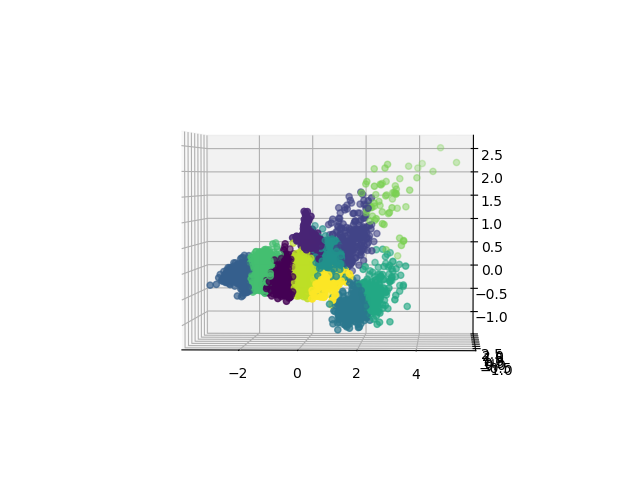

In [44]:
# Displaying points after kmeans, the colors change according to kmeans classification
# and not according to real label
%matplotlib notebook
fig12 = plt.figure()
ax12 = fig12.add_subplot(111, projection='3d')
ax12.scatter(x_projected[:,0], x_projected[:,1], x_projected[:,2], c = kmeans12.labels_)
plt.show()

In [50]:
# We can see that in this case applying Kmeans to the data projected to LDA axes does not 
# improve clustering. The rand index is still too low (0.3)